In [118]:
import pandas as pd
import numpy as np
import ast


In [119]:
kld_df = pd.read_csv('KLDscores.csv')

# Load book metadata
metadata_df = pd.read_csv('SPGC-metadata-2018-07-18.csv')

In [120]:
#preprocessing

kld_df['kld_values']=kld_df['kld_values'].apply(ast.literal_eval)


In [121]:
#Basic analysis
from scipy.stats import skew,kurtosis

kld_df['avg_kld'] = kld_df['kld_values'].apply(np.mean)
kld_df['variance_kld'] = kld_df['kld_values'].apply(np.var)
kld_df['slope_kld'] = kld_df['kld_values'].apply(lambda row: np.polyfit(np.arange(len(row)), row, 1)[0])
kld_df['range_kld'] = kld_df['kld_values'].apply(np.max) - kld_df['kld_values'].apply(np.min)
kld_df['median_kld'] = kld_df['kld_values'].apply(np.median)
kld_df['skew_kld'] = kld_df['kld_values'].apply(skew)
kld_df['kurtosis_kld']=kld_df['kld_values'].apply(kurtosis)
kld_df['sum_kld'] = kld_df['kld_values'].apply(np.sum)
kld_df['stdDev_kld'] = kld_df['kld_values'].apply(np.std)




In [122]:
book_score_merged = pd.merge(kld_df, metadata_df, left_on='filename',right_on='id')
book_score_merged


,filename,kld_values,avg_kld,variance_kld,slope_kld,range_kld,median_kld,skew_kld,kurtosis_kld,sum_kld,stdDev_kld,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.258026,0.223884,3.214062,14.083175,11.467601,0.040543,PG10002,The House on the Borderland,"Hodgson, William Hope",1877.0,1918.0,['en'],593.0,{'Science fiction'},Text
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.183832,0.239227,1.876079,5.665046,11.924212,0.033243,PG10005,A Voyage to the Moon: With Some Account of the...,"Tucker, George",1775.0,1861.0,['en'],17.0,"{'Space flight to the moon -- Fiction', 'Scien...",Text
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238...",0.241611,0.003573,0.001259,0.340330,0.229338,4.132600,16.760701,11.838955,0.059772,PG10003,"My First Years as a Frenchwoman, 1876-1879","Waddington, Mary King",1833.0,1923.0,['en'],11.0,"{'France -- History -- Third Republic, 1870-19...",Text
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.344778,0.233289,5.612184,33.819186,11.767495,0.047394,PG10008,The Mystery,"White, Stewart Edward",1873.0,1946.0,['en'],47.0,{'Science fiction'},Text
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2...",0.226469,0.000255,0.000054,0.086737,0.226679,0.209351,0.697714,11.096964,0.015966,PG10012,The Mountains of California,"Muir, John",1838.0,1914.0,['en'],93.0,"{'Natural history -- California', 'Mountain ec...",Text
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18983,PG9971,"[0.22838257901564088, 0.21120893011566938, 0.2...",0.251995,0.001736,0.000261,0.248395,0.245126,2.346952,7.848782,12.347758,0.041667,PG9971,"The Dramatic Works of Gerhart Hauptmann, Volume I","Hauptmann, Gerhart",1862.0,1946.0,['en'],25.0,{'German drama -- Translations into English'},Text
18984,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291...",0.234510,0.000634,0.000134,0.146047,0.229159,1.585406,4.177717,11.491008,0.025177,PG9993,Captivating Mary Carstairs,"Harrison, Henry Sydnor",1880.0,1930.0,['en'],8.0,{'Fiction'},Text
18985,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2...",0.228159,0.000825,0.000612,0.209988,0.225431,4.844731,27.714919,11.179781,0.028720,PG9983,Wylder's Hand,"Le Fanu, Joseph Sheridan",1814.0,1873.0,['en'],28.0,"{'Inheritance and succession -- Fiction', 'Mis...",Text
18986,PG996,"[0.24116003079407344, 0.21510152162479515, 0.2...",0.208989,0.000190,-0.000162,0.063100,0.205803,1.051833,0.829206,10.240453,0.013774,PG996,Don Quixote,"Cervantes Saavedra, Miguel de",1547.0,1616.0,['en'],4257.0,{'Spain -- Social life and customs -- 16th cen...,Text


In [123]:
correlation_matrix = book_score_merged[['avg_kld', 'variance_kld', 'slope_kld', 'range_kld', 'median_kld', 'skew_kld', 'kurtosis_kld', 'sum_kld', 'stdDev_kld', 'downloads']].corr()

# Extract the correlation of each feature with 'downloads'
correlation_with_downloads = correlation_matrix['downloads']

print("Correlation of each feature with downloads:")
print(correlation_with_downloads)

Correlation of each feature with downloads:
avg_kld        -0.024713
variance_kld   -0.016426
slope_kld      -0.043065
range_kld      -0.042833
median_kld     -0.016516
skew_kld       -0.048077
kurtosis_kld   -0.041708
sum_kld        -0.024713
stdDev_kld     -0.038199
downloads       1.000000
Name: downloads, dtype: float64


In [124]:
#linear regression
#not much use are variables are related -  Multi-collinearity

from sklearn.linear_model import LinearRegression, LassoCV
x = book_score_merged[['avg_kld', 'variance_kld', 'slope_kld', 'range_kld', 'median_kld', 'skew_kld', 'kurtosis_kld', 'sum_kld', 'stdDev_kld']]
y = book_score_merged['downloads']
reg = LinearRegression().fit(x, y)
print('Coefficients linear regression:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients linear regression: [-3.61494132e-02  7.14728944e+03 -1.63231948e+04  1.05549085e+02
 -4.31139171e+02 -2.81298803e+01  2.26740989e+00 -1.77132125e+00
 -1.30599063e+03]
Intercept: 253.6445442271201


In [125]:
# LASSO Regression for feature selection
lasso = LassoCV(cv=5).fit(x, y)
print('LASSO Coefficients:', lasso.coef_)
print('LASSO Intercept:', lasso.intercept_)

LASSO Coefficients: [ -0.           0.          -0.           0.          -0.
 -34.27336722   3.20102354  -9.84034256   0.        ]
LASSO Intercept: 233.05250180304586


USING LOG DOWNLOADS

In [126]:

# Prepare data for regression
book_score_merged['log_downloads'] = np.log1p(book_score_merged['downloads'])
x = book_score_merged[['avg_kld', 'variance_kld', 'slope_kld', 'range_kld', 'median_kld', 'skew_kld', 'kurtosis_kld', 'sum_kld', 'stdDev_kld']]
y = book_score_merged['log_downloads']

#Correlation
correlation_matrix = book_score_merged[['avg_kld', 'variance_kld', 'slope_kld', 'range_kld', 'median_kld', 'skew_kld', 'kurtosis_kld', 'sum_kld', 'stdDev_kld', 'log_downloads']].corr()
correlation_with_downloads = correlation_matrix['log_downloads']
print("Correlation of each feature with downloads:")
print(correlation_with_downloads)

# Linear Regression
reg = LinearRegression().fit(x, y)
print("Linear Regression")
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)



# LASSO Regression for feature selection
lasso = LassoCV(cv=5).fit(x, y)
print("Lasso")
print('LASSO Coefficients:', lasso.coef_)
print('LASSO Intercept:', lasso.intercept_)

Correlation of each feature with downloads:
avg_kld          0.005852
variance_kld     0.011330
slope_kld       -0.045165
range_kld       -0.035520
median_kld       0.010834
skew_kld        -0.059334
kurtosis_kld    -0.053626
sum_kld          0.005852
stdDev_kld      -0.020281
log_downloads    1.000000
Name: log_downloads, dtype: float64
Linear Regression
Coefficients: [ 1.10370875e-03  4.36104089e+01 -6.83558611e+01 -9.63794679e-01
 -2.25876360e+00 -7.40865137e-02  1.12650303e-02  5.40817288e-02
 -3.61568300e-01]
Intercept: 3.3601792744977854
Lasso
LASSO Coefficients: [ 0.          0.         -0.         -0.          0.         -0.
 -0.00729974  0.         -0.        ]
LASSO Intercept: 3.292401558198063


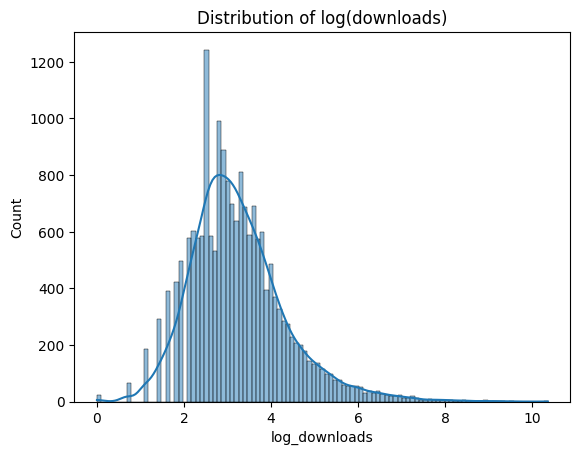

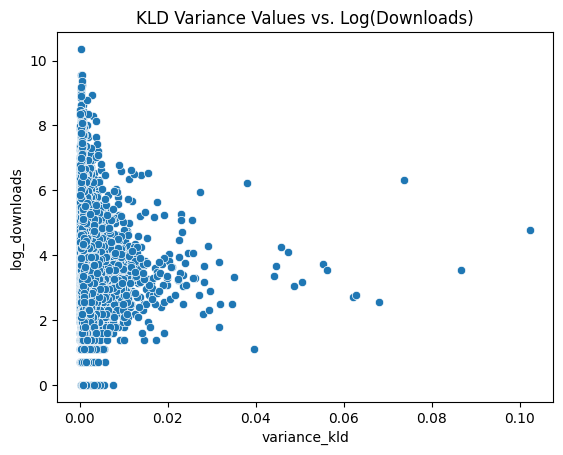

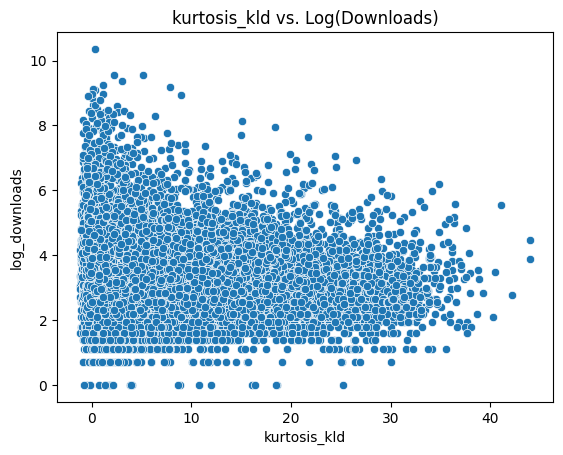

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of log(downloads)
sns.histplot(book_score_merged['log_downloads'], kde=True)
plt.title('Distribution of log(downloads)')
plt.show()

# Plot relationships between kld_values and log_downloads
sns.scatterplot(x='variance_kld', y='log_downloads', data=book_score_merged)
plt.title('KLD Variance Values vs. Log(Downloads)')
plt.show()

sns.scatterplot(x='kurtosis_kld', y='log_downloads', data=book_score_merged)
plt.title('kurtosis_kld vs. Log(Downloads)')
plt.show()



In [ ]:
book_score_merged = pd.merge(kld_df, metadata_df, left_on='filename',right_on='id')
book_score_merged


,filename,kld_values,avg_kld,variance_kld,slope_kld,range_kld,median_kld,skew_kld,kurtosis_kld,sum_kld,stdDev_kld,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.258026,0.223884,3.214062,14.083175,11.467601,0.040543,PG10002,The House on the Borderland,"Hodgson, William Hope",1877.0,1918.0,['en'],593.0,{'Science fiction'},Text
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.183832,0.239227,1.876079,5.665046,11.924212,0.033243,PG10005,A Voyage to the Moon: With Some Account of the...,"Tucker, George",1775.0,1861.0,['en'],17.0,"{'Space flight to the moon -- Fiction', 'Scien...",Text
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238...",0.241611,0.003573,0.001259,0.340330,0.229338,4.132600,16.760701,11.838955,0.059772,PG10003,"My First Years as a Frenchwoman, 1876-1879","Waddington, Mary King",1833.0,1923.0,['en'],11.0,"{'France -- History -- Third Republic, 1870-19...",Text
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.344778,0.233289,5.612184,33.819186,11.767495,0.047394,PG10008,The Mystery,"White, Stewart Edward",1873.0,1946.0,['en'],47.0,{'Science fiction'},Text
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2...",0.226469,0.000255,0.000054,0.086737,0.226679,0.209351,0.697714,11.096964,0.015966,PG10012,The Mountains of California,"Muir, John",1838.0,1914.0,['en'],93.0,"{'Natural history -- California', 'Mountain ec...",Text
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18983,PG9971,"[0.22838257901564088, 0.21120893011566938, 0.2...",0.251995,0.001736,0.000261,0.248395,0.245126,2.346952,7.848782,12.347758,0.041667,PG9971,"The Dramatic Works of Gerhart Hauptmann, Volume I","Hauptmann, Gerhart",1862.0,1946.0,['en'],25.0,{'German drama -- Translations into English'},Text
18984,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291...",0.234510,0.000634,0.000134,0.146047,0.229159,1.585406,4.177717,11.491008,0.025177,PG9993,Captivating Mary Carstairs,"Harrison, Henry Sydnor",1880.0,1930.0,['en'],8.0,{'Fiction'},Text
18985,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2...",0.228159,0.000825,0.000612,0.209988,0.225431,4.844731,27.714919,11.179781,0.028720,PG9983,Wylder's Hand,"Le Fanu, Joseph Sheridan",1814.0,1873.0,['en'],28.0,"{'Inheritance and succession -- Fiction', 'Mis...",Text
18986,PG996,"[0.24116003079407344, 0.21510152162479515, 0.2...",0.208989,0.000190,-0.000162,0.063100,0.205803,1.051833,0.829206,10.240453,0.013774,PG996,Don Quixote,"Cervantes Saavedra, Miguel de",1547.0,1616.0,['en'],4257.0,{'Spain -- Social life and customs -- 16th cen...,Text


In [128]:
extra=pd.read_csv("extra_controls.csv")

In [129]:
book_merged= pd.merge(book_score_merged , extra, left_on='filename',right_on='id')
book_merged


,filename,kld_values,avg_kld,variance_kld,slope_kld,range_kld,median_kld,skew_kld,kurtosis_kld,sum_kld,...,subj2_horror,subj2_mystery,subj2_crime,subj2_history,subj2_periodicals,subj2_others,speed,sentiment_avg,sentiment_vol,wordcount
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.258026,0.223884,3.214062,14.083175,11.467601,...,0,0,0,0,0,0,0.224141,0.08737,0.002701,50831.0
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.183832,0.239227,1.876079,5.665046,11.924212,...,0,0,0,0,0,0,0.221966,0.13182,0.003394,70142.0
2,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.344778,0.233289,5.612184,33.819186,11.767495,...,0,0,0,0,0,0,0.204838,0.10778,0.003655,65421.0
3,PG10024,"[0.284910811514924, 0.24774669455226234, 0.267...",0.254255,0.001386,0.000174,0.206700,0.247747,1.263222,2.635247,12.458504,...,0,0,0,0,0,0,0.243380,0.14034,0.002940,49162.0
4,PG10057,"[0.22988547820277444, 0.24055226987795503, 0.2...",0.247845,0.001715,0.000090,0.278862,0.240552,3.735866,18.184986,12.144391,...,0,1,0,0,0,0,0.221491,0.14015,0.003855,50680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,PG9986,"[0.23145821926283078, 0.21821643194247953, 0.2...",0.238457,0.000984,0.000811,0.150171,0.233220,1.052309,1.103923,11.684382,...,0,0,0,0,0,1,0.180942,0.14979,0.006868,85950.0
8545,PG9981,"[0.22398044121450278, 0.2177760219339848, 0.22...",0.235281,0.001369,0.000817,0.255983,0.227832,4.615874,24.842277,11.528790,...,0,0,0,0,0,1,0.184776,0.14477,0.006882,116648.0
8546,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291...",0.234510,0.000634,0.000134,0.146047,0.229159,1.585406,4.177717,11.491008,...,0,0,0,0,0,1,0.179779,0.13360,0.005026,84156.0
8547,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2...",0.228159,0.000825,0.000612,0.209988,0.225431,4.844731,27.714919,11.179781,...,0,1,0,0,0,0,0.152456,0.15343,0.009224,167578.0


In [138]:
genres = ['war', 'adventure', 'comedy', 'biography', 'romance', 'drama', 'fantasy', 'family', 'sciencefiction', 'action', 'thriller', 'western', 'horror', 'mystery', 'crime', 'history', 'periodicals', 'others']
results = []

# book_merged['log_downloads']=np.log1p(book_merged['downloads'])
for genre in genres:
    print(genre)
    genre_data = book_merged[book_merged[f'subj2_{genre}'] == 1]
    correlation_matrix = genre_data[['avg_kld', 'variance_kld', 'slope_kld', 'range_kld', 'median_kld', 'skew_kld', 'kurtosis_kld', 'sum_kld', 'stdDev_kld', 'log_downloads']].corr()
    correlation_with_downloads = correlation_matrix['log_downloads']
    print("Correlation of each feature with downloads:")
    print(correlation_with_downloads)
    result = {
        'genre': genre,
        'correlation_with_downloads': correlation_with_downloads.to_dict()
    }
    x = genre_data[['avg_kld', 'variance_kld', 'slope_kld', 'range_kld', 'median_kld', 'skew_kld', 'kurtosis_kld', 'sum_kld', 'stdDev_kld']]
    y = genre_data['log_downloads']
    # reg = LinearRegression().fit(x, y)
    # print('Coefficients linear regression:', reg.coef_)
    # print('Intercept:', reg.intercept_)
    if len(x)>5 and len(y)>5:
        lasso = LassoCV(cv=5).fit(x, y)
        print("Lasso")
        print('LASSO Coefficients:', lasso.coef_)
        print('LASSO Intercept:', lasso.intercept_)
        result['lasso_coefficients'] = lasso.coef_
        result['lasso_intercept'] = lasso.intercept_

    # Append the result to the results list
    results.append(result)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display or save the results DataFrame
print(results_df)
results_df.to_excel("final_summary.xlsx", index=False, engine='openpyxl')


    
    


    # sns.scatterplot(x='avg_kld', y='log_downloads', data=genre_data)
    # plt.title(f'KLD Values vs. Log(Downloads) for {genre.capitalize()}')
    # plt.show()

war
Correlation of each feature with downloads:
avg_kld         -0.132542
variance_kld    -0.146795
slope_kld       -0.118566
range_kld       -0.151278
median_kld      -0.111510
skew_kld        -0.095300
kurtosis_kld    -0.078620
sum_kld         -0.132542
stdDev_kld      -0.174321
log_downloads    1.000000
Name: log_downloads, dtype: float64
Lasso
LASSO Coefficients: [-0.         -0.         -0.         -0.         -0.         -0.
 -0.01158645 -0.18242654 -0.        ]
LASSO Intercept: 5.353243638412726
adventure
Correlation of each feature with downloads:
avg_kld         -0.194797
variance_kld    -0.168659
slope_kld       -0.154844
range_kld       -0.168007
median_kld      -0.165122
skew_kld        -0.119122
kurtosis_kld    -0.101421
sum_kld         -0.194797
stdDev_kld      -0.198029
log_downloads    1.000000
Name: log_downloads, dtype: float64
Lasso
LASSO Coefficients: [-0.         -0.         -0.         -0.         -0.         -0.02585446
 -0.01136924 -0.3607272  -0.        ]
LASSO